# Transformer Decoder-only model
This Transformer is based, like Bert, on an encoder only. Therefore, there is no need to supply data to the decoder. However, the Transformer loses its ability to sequentially predict during inference and thus n models must be constructed for multi-step prediction.

This notebook presents the results achieved using the multi-step forecasting model.

In [1]:
import torch

from config import get_config
import inference_helpers

import numpy as np

from sklearn.metrics import mean_squared_error

In [2]:
from importlib import reload
reload(inference_helpers)

<module 'inference_helpers' from 'c:\\Users\\obhlivoj\\DP\\System-Imbalance-Forecasting\\models\\transformer_decoder_only\\inference_helpers.py'>

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
cfg = get_config()

Using device: cuda


We present summary statistics on validation data. To measure error, it was used RMSE, MAE and R2 score. The error is computed for every prediction separately.

In [3]:
params = ("d_ff", "d_d", "Nx", "n_head", "dropout", "lr")

In [4]:
best_metrics, best_models_inds, data_dict = inference_helpers.get_best_model(cfg, './loss/runfinal_')
loss_validation, loss_cat, preds_gt = inference_helpers.validate_n_models(device, 'final_', params, best_models_inds, eval_data="val")

MODEL EVAL - #1
--------------------


100%|██████████| 14/14 [00:00<00:00, 105.54it/s]

--------------------


MODEL EVAL - #2
--------------------


100%|██████████| 14/14 [00:00<00:00, 62.67it/s]


--------------------
MODEL EVAL - #3
--------------------


100%|██████████| 14/14 [00:00<00:00, 48.91it/s]


--------------------
MODEL EVAL - #4
--------------------


100%|██████████| 14/14 [00:00<00:00, 50.31it/s]


--------------------
MODEL EVAL - #5
--------------------


100%|██████████| 14/14 [00:00<00:00, 55.93it/s]


--------------------
MODEL EVAL - #6
--------------------


100%|██████████| 14/14 [00:00<00:00, 55.17it/s]


--------------------
MODEL EVAL - #7
--------------------


100%|██████████| 14/14 [00:00<00:00, 58.10it/s]


--------------------
MODEL EVAL - #8
--------------------


100%|██████████| 14/14 [00:00<00:00, 54.20it/s]


--------------------
Time-step	Error
1		14137.56
2		19786.75
3		22581.45
4		23534.89
5		25775.89
6		26480.99
7		27475.89
8		27352.37


In [5]:
res = inference_helpers.compute_val_errors(preds_gt, 8)

Model	RMSE	MAPE	MAE	R2
1	118.90	2.98	88.67	0.53
2	140.67	2.86	103.50	0.35
3	150.27	2.73	110.05	0.26
4	153.41	3.08	113.11	0.22
5	160.55	3.07	118.00	0.15
6	162.73	2.83	119.07	0.13
7	165.76	2.62	120.73	0.09
8	165.39	2.88	120.99	0.10


In [6]:
loss_validation, loss_cat, preds_gt = inference_helpers.validate_n_models(device, 'final_', params, best_models_inds, eval_data="test")

MODEL EVAL - #1
--------------------


100%|██████████| 14/14 [00:00<00:00, 51.23it/s]


--------------------
MODEL EVAL - #2
--------------------


100%|██████████| 14/14 [00:00<00:00, 66.32it/s]


--------------------
MODEL EVAL - #3
--------------------


100%|██████████| 14/14 [00:00<00:00, 58.25it/s]


--------------------
MODEL EVAL - #4
--------------------


100%|██████████| 14/14 [00:00<00:00, 64.83it/s]


--------------------
MODEL EVAL - #5
--------------------


100%|██████████| 14/14 [00:00<00:00, 61.02it/s]


--------------------
MODEL EVAL - #6
--------------------


100%|██████████| 14/14 [00:00<00:00, 62.95it/s]


--------------------
MODEL EVAL - #7
--------------------


100%|██████████| 14/14 [00:00<00:00, 60.25it/s]


--------------------
MODEL EVAL - #8
--------------------


100%|██████████| 14/14 [00:00<00:00, 60.24it/s]


--------------------
Time-step	Error
1		12613.85
2		18191.36
3		20987.08
4		22285.43
5		24758.46
6		25146.62
7		26091.24
8		26142.94


In [7]:
res = inference_helpers.compute_val_errors(preds_gt, 8)

Model	RMSE	MAPE	MAE	R2
1	112.31	4.06	82.84	0.53
2	134.88	3.91	97.63	0.33
3	144.87	3.64	103.59	0.23
4	149.28	4.18	106.85	0.18
5	157.35	4.87	113.14	0.09
6	158.58	4.25	112.74	0.07
7	161.53	3.25	113.58	0.04
8	161.69	4.20	115.03	0.03


The visual results are shown in the following graphs. Plotted are the k best, worst and random predictions against the average RMSE over all prediction steps.

In [5]:
seq_data = inference_helpers.group_data(preds_gt)

rmse_data = np.empty(len(seq_data), dtype=np.float32)
for ind, dp in enumerate(seq_data):
    rmse_data[ind] = mean_squared_error(dp['true'], dp['pred'], squared=False)

# get k random, best and worst predictions
k = 3
min_loss_inds = np.argsort(rmse_data)[:k].tolist()
max_loss_inds = np.argsort(rmse_data)[-k:].tolist()
rand_inds = np.random.randint(0, len(rmse_data), size=k).tolist()

### Bad predictions

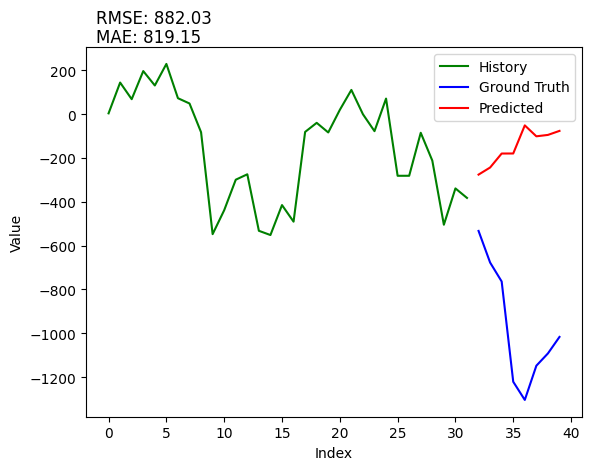

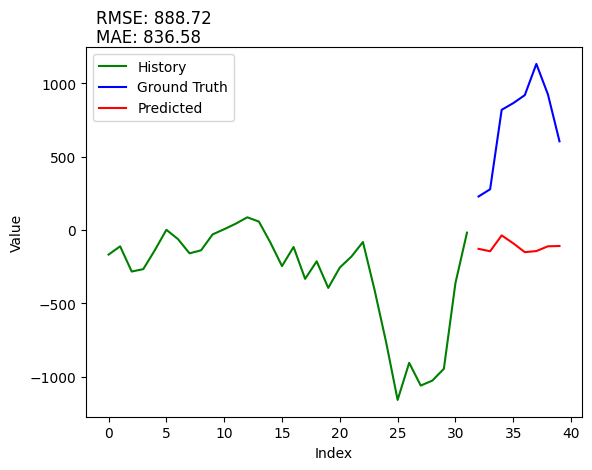

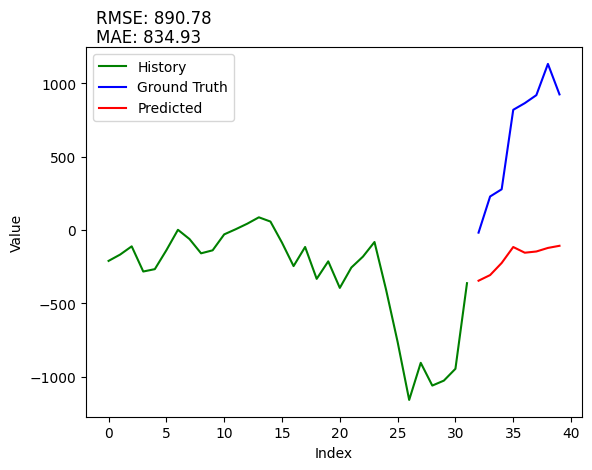

In [6]:
inference_helpers.plot_k_results(seq_data, max_loss_inds)

### Good predictions

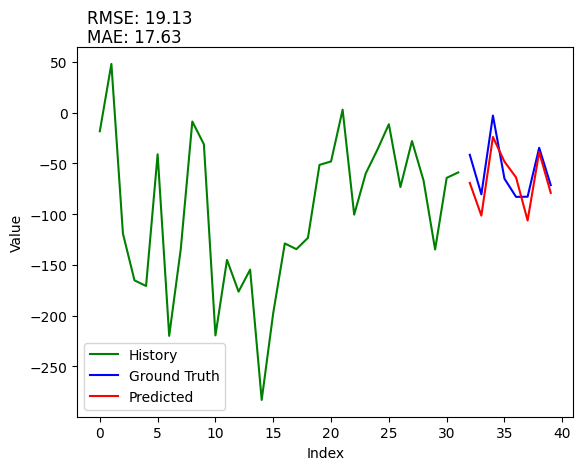

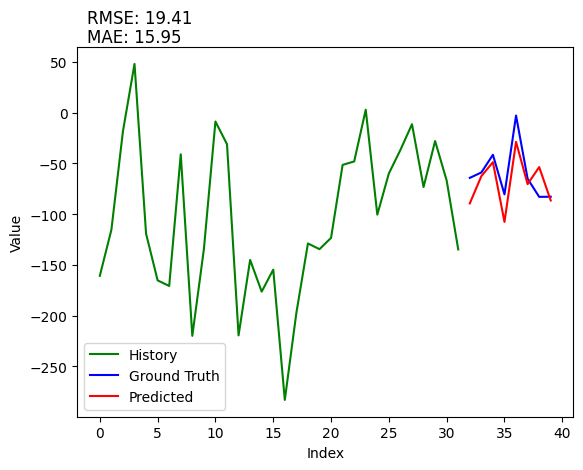

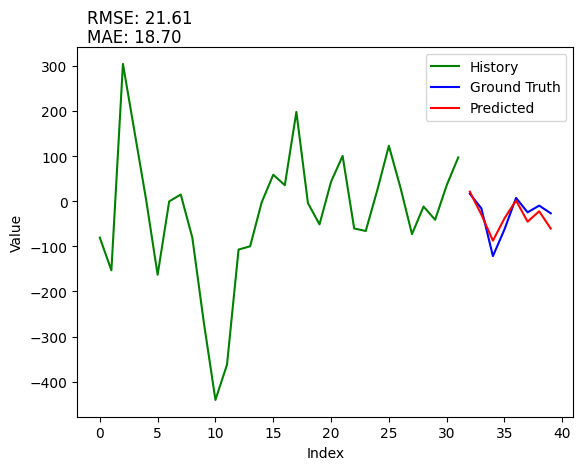

In [7]:
inference_helpers.plot_k_results(seq_data, min_loss_inds)

### Random predictions

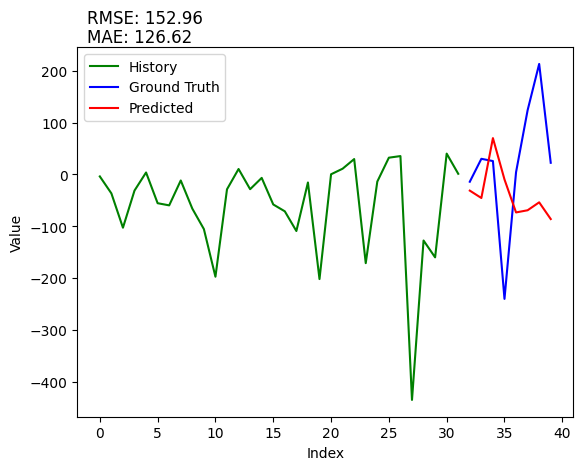

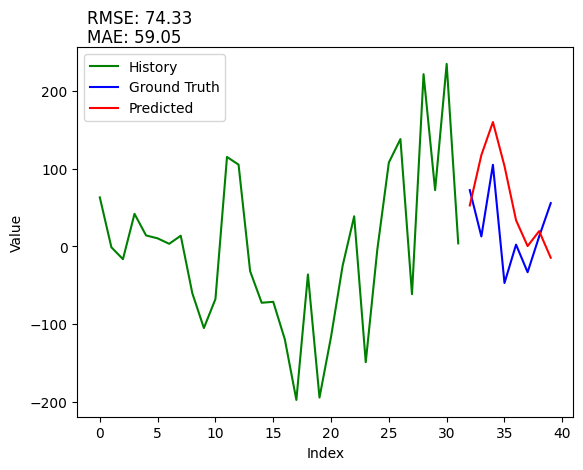

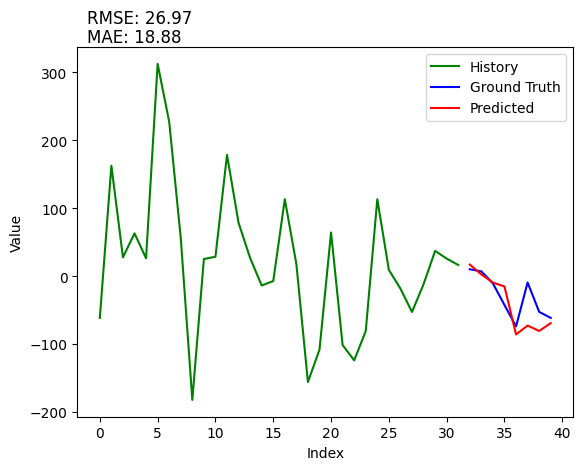

In [8]:
inference_helpers.plot_k_results(seq_data, rand_inds)